In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
# we can give an index number or name for our index column, or leave it blank
df = pd.read_csv('prepped_convictions_data.csv', index_col='Defendants')
df

,Date of the Crime,Type of the Crime,Location of the Crime,Punishment for a crime,Legally Exonerated Encoded
Defendants,,,,,
Dominic Daley and James Halligan,1805,16,16,35.0,1
John Gordon,1843,16,30,35.0,1
Chief Leschi,1855,16,35,35.0,0
Chipita Rodriguez,1863,16,33,35.0,1
William Jackson Marion,1872,16,21,35.0,1
...,...,...,...,...,...
Arthur Morris and Jeanie Becerra,2014,1,12,39.0,1
Tazell Cash,2016,34,17,8.0,1
Michael Hickingbottom,2017,1,10,25.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, Dominic Daley and James Halligan to Brenda Jones
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date of the Crime           169 non-null    int64  
 1   Type of the Crime           169 non-null    int64  
 2   Location of the Crime       169 non-null    int64  
 3   Punishment for a crime      169 non-null    float64
 4   Legally Exonerated Encoded  169 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 7.9+ KB


## Modeling

In [4]:
features = df.drop('Legally Exonerated Encoded', axis=1)
targets = df['Legally Exonerated Encoded']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)

In [6]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

## Evaluation

In [7]:
# our "no information" rate is 84.6%, or the majority class fraction
df['Legally Exonerated Encoded'].value_counts(normalize=True)

1    0.852071
0    0.147929
Name: Legally Exonerated Encoded, dtype: float64

In [8]:
print(lr_model.score(x_train, y_train))
print(lr_model.score(x_test, y_test))

0.8492063492063492
0.8604651162790697


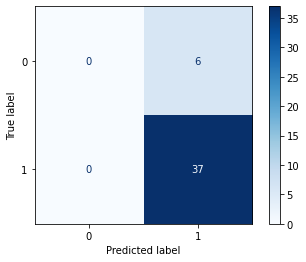

In [9]:
plot_confusion_matrix(lr_model, x_test, y_test, cmap='Blues')#, colorbar=False) # this argument only works with sklearn 0.24 and up

In [10]:
lr_model.predict_proba(x_test)[:5]

array([[0.06254735, 0.93745265],
       [0.19372511, 0.80627489],
       [0.17241677, 0.82758323],
       [0.07761251, 0.92238749],
       [0.07723869, 0.92276131]])

In [11]:
lr_model.predict(x_test)[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [12]:
(lr_model.predict_proba(x_test)[:5, 1] > 0.5).astype('int')

array([1, 1, 1, 1, 1])

In [13]:
predictions_lower_thresh = (lr_model.predict_proba(x_test)[:, 1] > 0.13).astype('int')

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, predictions_lower_thresh))
tn, fp, fn, tp  = confusion_matrix(y_test, predictions_lower_thresh).flatten()
print(tp / (tp + fn))

0.8604651162790697
1.0


In [15]:
lr_model.coef_

array([[ 0.00186389, -0.01138637, -0.04733811, -0.02449466]])

In [16]:
features.columns

Index(['Date of the Crime', 'Type of the Crime', 'Location of the Crime',
       'Punishment for a crime'],
      dtype='object')

In [17]:
coef_df = pd.DataFrame(data=lr_model.coef_, columns=features.columns)

<AxesSubplot:>

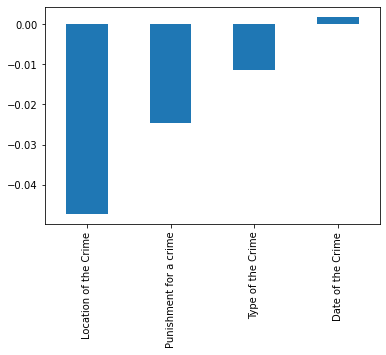

In [18]:
coef_df.T.sort_values(by=0).plot.bar(legend=False)

## Feature Selection

In [19]:
import seaborn as sns

<AxesSubplot:>

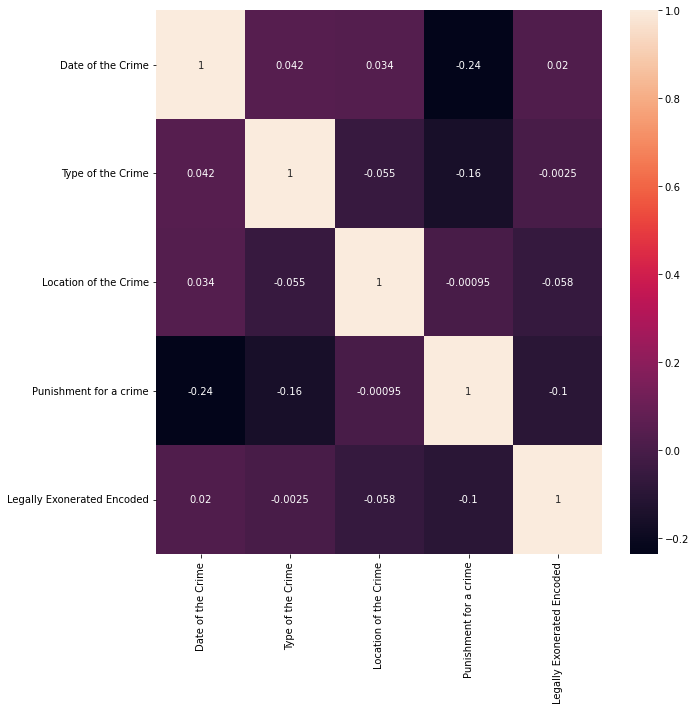

In [20]:
f = plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:title={'center':'Feature Importance'}>

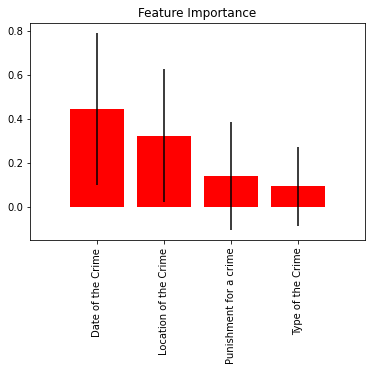

In [21]:
from scikitplot.estimators import plot_feature_importances
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, max_features=4, random_state=42)
rfc.fit(x_train, y_train)

plot_feature_importances(rfc, feature_names=features.columns, x_tick_rotation=90)